# Chapter 2: Drawing with 2D Vectors

## 2.1 Picturing 2D Vectors

In [1]:
%load_ext autoreload
%autoreload 2
from vector_drawing import *

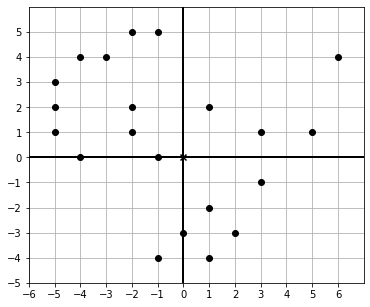

In [2]:
dino_vectors = [(6,4), (3,1), (1,2), (-1,5), (-2,5), (-3,4), (-4,4),
    (-5,3), (-5,2), (-2,2), (-5,1), (-4,0), (-2,1), (-1,0), (0,-3),
    (-1,-4), (1,-4), (2,-3), (1,-2), (3,-1), (5,1)
]

draw(
    Points(*dino_vectors)
)

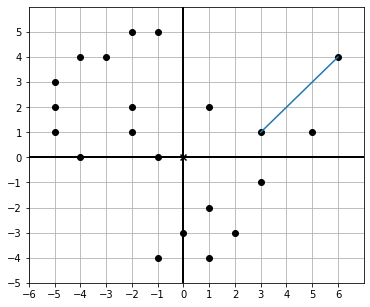

In [3]:
draw(
    Points(*dino_vectors),
    Segment((6,4), (3,1))
)

**EXERCISE:** Draw the dinosaur with the dots connected by constructing a `Polygon` object with the `dino_vectors` as its vertices.

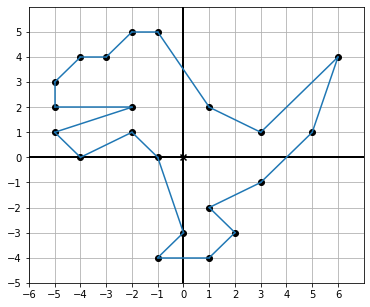

In [10]:
draw(
    Points(*dino_vectors),
    Polygon(*dino_vectors)
)

**EXERCISE** Draw the vectors `[(x,x**2) for x in range(-10,11)]` as points (dots) using the draw function.  What is the result?

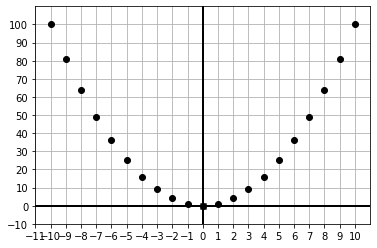

In [13]:
draw(
    Points(*[(x, x**2) for x in range(-10,11)]),
    grid=(1,10),
    nice_aspect_ratio=False
)

# Plane Vector Arithmetic

In [15]:
def add(v1, v2):
    return (v1[0] + v2[0], v1[1] + v2[1])

In [16]:
dino_vectors2 = [add((-1.5,-2.5), v) for v in dino_vectors]

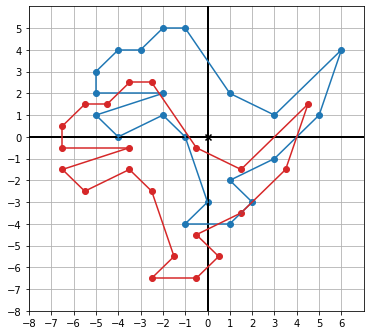

In [17]:
draw(
    Points(*dino_vectors, color=blue),
    Polygon(*dino_vectors, color=blue),
    Points(*dino_vectors2, color=red),
    Polygon(*dino_vectors2, color=red)
    )

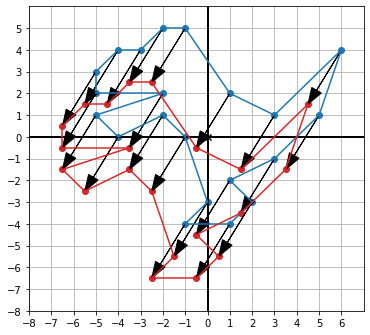

In [46]:
arrows = [Arrow(tip, tail, color=black) for (tip, tail) in zip(dino_vectors2, dino_vectors)]

draw(
    Points(*dino_vectors, color=blue),
    Polygon(*dino_vectors, color=blue),
    Points(*dino_vectors2, color=red),
    Polygon(*dino_vectors2, color=red),
    *arrows,
    )


## Vector components and lengths

In [49]:
from math import sqrt
def length(vector):
    return sqrt(vector[0]**2 + vector[1]**2)

## Subtraction, displacement, and distance

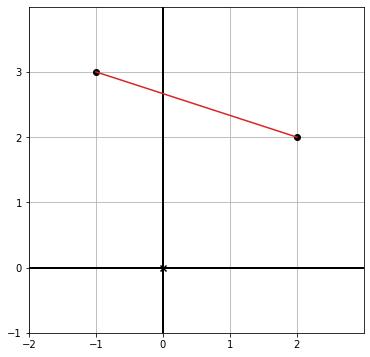

In [57]:
draw(
    Points((2,2), (-1,3)),
    Segment((2,2), (-1,3), color=red)
)

**MINI-PROJECT:** You can add any number of vectors together by summing all of their $x$-coordinates and all of their $y$-coordinates.  For instance the four-fold sum (1,2) + (2,4) + (3,6) + (4,8) has $x$-component 1 + 2 + 3 + 4 = 10 and $y$-component 2 + 4 + 6 + 8 = 20, making the result (10,20).  Implement a revised add function that takes any number of vectors as arguments.

In [63]:
def add(*vectors):
    return [sum(component) for component in zip(*vectors)]

In [70]:
vectors_2d = [(1,2), (2,4), (3,6), (4,8)]
vectors_3d = [(1,2,3), (2,4,5), (3,6,7), (4,8,9)]

add(*vectors_2d), add(*vectors_3d)

([10, 20], [10, 20, 24])

**EXERCISE:** Write a function translate(translation, vectors) that takes in a translation vector and a list of input vectors and returns a list of the input vectors all translated by the translation vector. For instance, `translate((1,1), [(0,0), (0,1,), (-3,-3)])` should return `[(1,1),(1,2),(-2,-2)]`.

In [72]:
def translate(t, vectors):
    return [add(t, vector) for vector in vectors]


In [74]:
translate((1,1), [(0,0), (0,1), (-3,-3)])

[[1, 1], [1, 2], [-2, -2]]

In [106]:
translate((1,1), dino_vectors)

[[7, 5],
 [4, 2],
 [2, 3],
 [0, 6],
 [-1, 6],
 [-2, 5],
 [-3, 5],
 [-4, 4],
 [-4, 3],
 [-1, 3],
 [-4, 2],
 [-3, 1],
 [-1, 2],
 [0, 1],
 [1, -2],
 [0, -3],
 [2, -3],
 [3, -2],
 [2, -1],
 [4, 0],
 [6, 2]]

**MINI-PROJECT:** Write a Python function using vector addition to show 100 simultaneous and non-overlapping copies of the dinosaur.  This shows the power of computer graphics: imagine how tedious it would be to specify all 2,100 coordinate pairs by hand!

In [121]:
def hundred_dinos():
    xform = [Polygon(*translate((x, y), dino_vectors)) 
            for y in range(10, 120, 12) for x in range(10, 120, 12)]
    draw(*xform, grid=None, axes=None, origin=None)

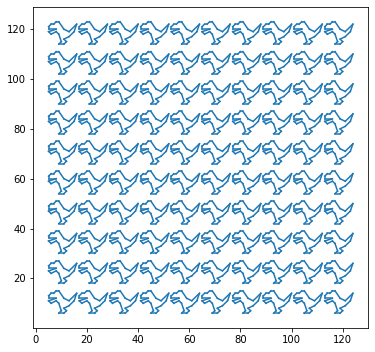

In [122]:
hundred_dinos()

In [15]:
def hundred_dinos():
    translation = [(12*x, 12*y) for x in range(0,9) for y in range(0,9)]
    dinos = [Polygon(*translate(t, dino_vectors)) for t in translation]
    draw(*dinos, grid=None, axes=None, origin=None)

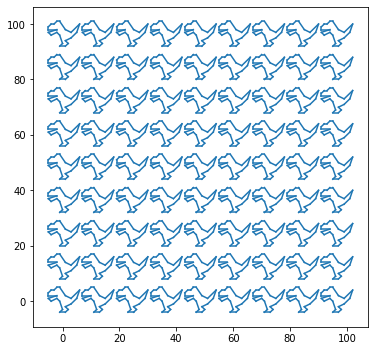

In [16]:
hundred_dinos()

**EXERCISE:** What vector in the dino_vectors list has the longest length?  Use the Python length function to compute the answer quickly.

In [123]:
max(dino_vectors, key=length)

(6, 4)

**EXERCISE:** Suppose a vector $\vec{w}$ has coordinates $(2 ,3)$.  What are the approximate coordinates of the scalar multiple $\pi \cdot \vec{w}$?  Draw an approximation of the original vector and the new vector.

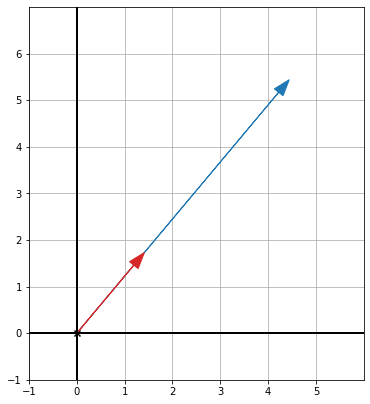

In [132]:
from math import pi, sqrt
u = (sqrt(2), sqrt(3))
v = [pi * component for component in u]

draw(
    Arrow(v, color=blue),
    Arrow(u),
)

**EXERCISE:** Write a python function `scale(s, v)` that multiplies the input vector `v` by the input scalar `s`.

In [138]:
def scale(scalar, vector):
    return [scalar * component for component in vector]

In [139]:
scale(5, (4,5))

[20, 25]

**MINI-PROJECT:** Suppose $\vec{u} = (-1,1)$ and $\vec{v} = (1,1)$ and suppose $r$ and $s$ are real numbers.  Specifically, let’s assume $-1 < r < 1$ and $-3 < s < 3$.  

Where are the possible points on the plane where the vector $r \cdot \vec{u} + s \cdot \vec{v}$ could end up?  

Note: the order of operations is the same for vectors as it is for numbers: we assume scalar multiplication is carried out first, and then vector addition (unless parentheses specify otherwise).

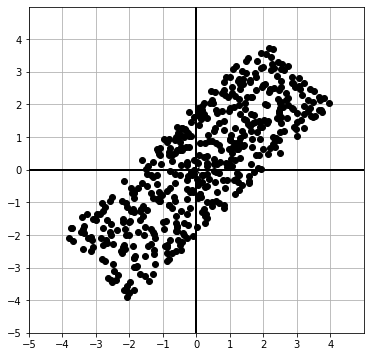

In [178]:
import random

u = (-1,1)
v = (1,1)

vectors = [add(scale(random.uniform(-1,1), u), scale(random.uniform(-3,3), v)) 
for i in range(0,500)]

draw(
    Points(*vectors)
)

**EXERCISE:** Write a Python function `subtract(v1,v2)` that returns the result of `v1` minus `v2`, where the inputs and output are tuples of coordinates as we’ve seen so far.

In [30]:
def subtract(v1,v2):
    return (v1[0] - v2[0], v1[1] - v2[1])

In [192]:
import functools
def subtract(v1,v2):
    return [functools.reduce(lambda x,y: x-y, component) for component in zip(v1,v2)]

In [195]:
u = (2,3,4,4,4)
v = (1,2,3,4,34)

subtract(u,v)

[1, 1, 1, 0, -30]

In [198]:
def distance(v1,v2):
    return length(subtract(v1,v2))

In [200]:
u = (4,5)
v = (1,1)

distance(u,v)

5.0

In [246]:
def perimeter(vectors):
    distances = [distance(vectors[i], vectors[(i+1)%len(vectors)])
                    for i in range(0,len(vectors))]
    return sum(distances)

In [247]:
perimeter(dino_vectors)

44.77115093694563

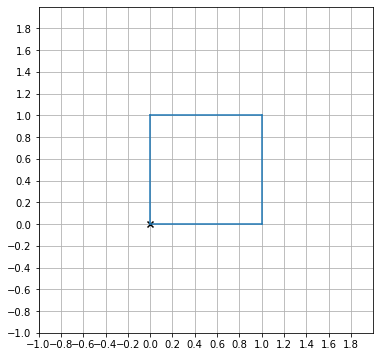

In [248]:
# sanity check with a square
square = [(1,0),(1,1),(0,1),(0,0)]
draw(Polygon(*square), grid=(0.2,0.2), axes=None)

In [249]:
# should be 1+1+1+1=4
perimeter(square)

4.0

In [232]:
positional_vectors = [Arrow(vector, color=blue) for vector in dino_vectors]

def displacement_vectors(vectors):
    disp_vectors = [(vectors[i], vectors[(i+1)%len(vectors)])
                     for i in range(0, len(vectors))]
    return [Arrow(*vector) for vector in disp_vectors]

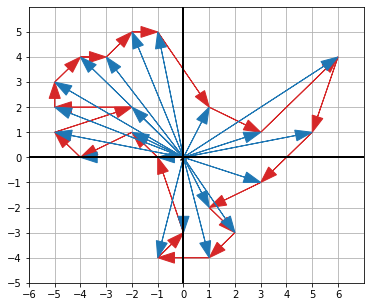

In [234]:
draw(*displacement_vectors(dino_vectors),
    *positional_vectors
    )


**MINI-PROJECT:** Let $\vec{u}$ be the vector $(1,2)$.  Suppose there is another vector, $\vec{v}$, with positive integer coordinates $(n, m)$ such that $n > m$, and having distance $13$ from $\vec{u}$.  What is the displacement from $\vec{u}$ to $\vec{v}$?  Hint: you can use Python to search for the vector $\vec{v}$.

In [317]:
import random

u = (1,2)
# r(n,m) = ?
# n > m > 0 
# distance(u,r) = 13

for n in range(u[0]-13, u[0]+14):
    for m in range(u[1]-13, u[1]+14):
        if (distance(u, (n,m)) == 13) and (n > m > 0):
            print(n,m) 

13 7
14 2


In [319]:
# sanity check
distance(u,(13,7)), distance(u,(14,2)) 

(13.0, 13.0)

In [321]:
import random

u = (1,-1)
# r(n,m) = ?
# n > m > 0 
# distance(u,r) = 13

for n in range(u[0]-13, u[0]+14):
    for m in range(u[1]-13, u[1]+14):
        if (distance(u, (n,m)) == 13) and (n > m > 0):
            print(n,m) 

13 4


In [322]:
# sanity check
distance(u,(13,4))

13.0

# Angles and trigonometry in the plane

## Radians and trigonometry in python

In [42]:
from math import sin,cos,pi,atan2,tan

def to_cartesian(radius, angle):
    x = radius * cos(angle)
    y = radius * sin(angle)
    return (x,y)


In [43]:
to_cartesian(5, 37*pi/180)

(3.993177550236464, 3.0090751157602416)

In [44]:
def to_polar(vector):
    x, y = vector[0], vector[1]
    angle = atan2(y, x)
    return (length(vector), angle)

In [45]:
to_polar((1,1))

(1.4142135623730951, 0.7853981633974483)

In [46]:
def to_radians(angle):
    return (angle*pi/180)

In [47]:
u = (8.5, to_radians(125))

to_cartesian(*u)

(-4.875399708983889, 6.962792376456433)

In [48]:
180/pi


57.29577951308232

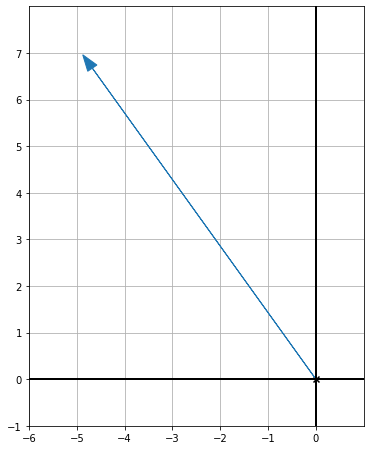

In [49]:
draw(Arrow(to_cartesian(*u), color=blue))

In [50]:
length((sqrt(3)/2, 1/2))

0.9999999999999999

In [51]:
print(f'sin(30)={sin(to_radians(30))}, cos(30)= {cos(to_radians(30))}, tan(30)={tan(to_radians(30))}')


sin(30)=0.49999999999999994, cos(30)= 0.8660254037844387, tan(30)=0.5773502691896257


In [52]:
print(f'sin(60)={sin(to_radians(60))}, cos(60)= {cos(to_radians(60))}, tan(60)={tan(to_radians(60))}')

sin(60)=0.8660254037844386, cos(60)= 0.5000000000000001, tan(60)=1.7320508075688767


In [53]:
to_radians(116.57)

2.03453030904979

In [54]:
cos(10*pi/6)
sin(10*pi/6)

-0.8660254037844386

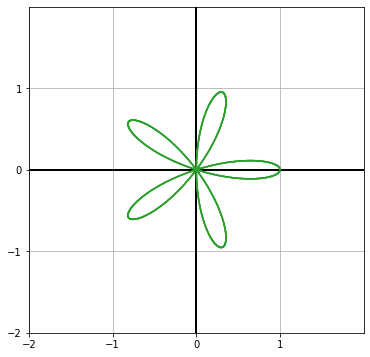

In [55]:
polar_coords = [(cos(x*pi/100.0), 2*pi*x/1000.0) for x in range(0,1000)]
vectors = [to_cartesian(*p) for p in polar_coords]
draw(Polygon(*vectors, color=green))

In [56]:
atan2(3,-2)

2.158798930342464

In [57]:
-3/2

-1.5

In [58]:
tan(2.159)

-1.4993467206361923

In [59]:
from math import atan

In [60]:
atan(-3/2)

-0.982793723247329

In [61]:
tan(1/1)

1.5574077246549023

In [62]:
to_polar((1,1))

(1.4142135623730951, 0.7853981633974483)

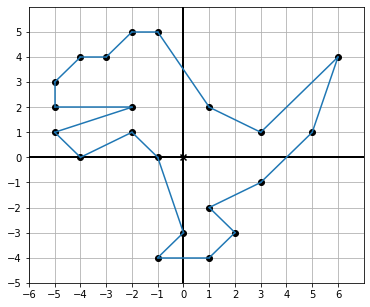

In [63]:
draw(Points(*dino_vectors), Polygon(*dino_vectors))

In [64]:
mouth_pivot = (-2,2)
mouth_top = (-5,2)
mouth_bottom = (-5,1)

v1 = subtract(mouth_top, mouth_pivot)
v2 = subtract(mouth_bottom, mouth_pivot)

v1,v2

((-3, 0), (-3, -1))

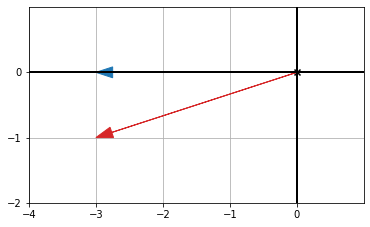

In [65]:
draw(Arrow(v1, color=blue),
    Arrow(v2))

In [66]:
_,angle1 = to_polar(v1)
_,angle2 = to_polar(v2)

angle1,angle2

(3.141592653589793, -2.819842099193151)

In [67]:
angle_mouth = angle2 + angle1
angle_mouth * (180/pi)

18.434948822922006

# Transforming collections of vectors

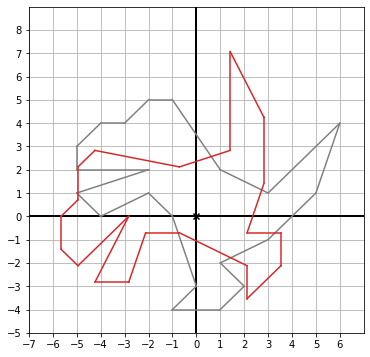

In [68]:
rotation_angle = pi/4
dino_polar = [to_polar(v) for v in dino_vectors]
dino_rotated_polar = [(l,angle + rotation_angle) for l,angle in dino_polar]
dino_rotated = [to_cartesian(*p) for p in dino_rotated_polar]
draw(
    Polygon(*dino_vectors, color=gray),
    Polygon(*dino_rotated, color=red)
)

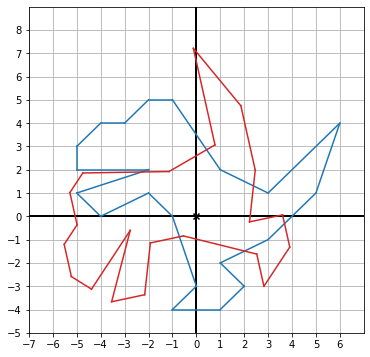

In [69]:
rotation_angle = 1
dino_polar = [to_polar(vector) for vector in dino_vectors]
dino_rotated_polar = [(l, angle + rotation_angle) for l, angle in dino_polar]
dino_rotated = [to_cartesian(*vector) for vector in dino_rotated_polar]

draw(Polygon(*dino_vectors, color=blue),
    Polygon(*dino_rotated, color=red))

In [91]:
def rotate(rotation_angle, *vectors):
    # to polar
    vectors_polar = [to_polar(v) for v in vectors]
    # rotate vectors
    vectors_rotated_polar = [(l, angle + rotation_angle) for l,angle in vectors_polar]
    # to cartesian
    vectors_rotated_cartesian = [to_cartesian(*v) for v in vectors_rotated_polar]

    return vectors_rotated_cartesian


In [93]:
dino_rotated = rotate(pi/4, *dino_vectors)

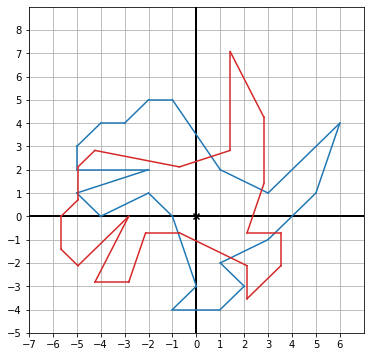

In [94]:
draw(Polygon(*dino_vectors, color=blue),
    Polygon(*dino_rotated, color=red))

In [95]:
rotate(pi/8, (2,2), (3,2))

[(1.0823922002923942, 2.613125929752753),
 (2.0062717328036808, 2.9958093621178428)]

## Combining vector transformations

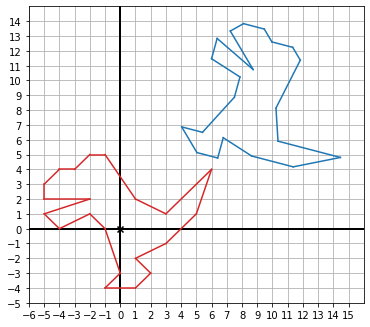

In [104]:
new_dino = translate((8,8), rotate(5 * pi/3, *dino_vectors))

draw(Polygon(*new_dino),
    Polygon(*dino_vectors, color=red))

In [168]:
def regular_polygon(n_gon):
    angle = to_radians(360/n_gon)
    polar = [(1, angle * (n+1)) for n in range(0, n_gon)]
    return [to_cartesian(*v) for v in polar]

regular_polygon(4)

[(6.123233995736766e-17, 1.0),
 (-1.0, 1.2246467991473532e-16),
 (-1.8369701987210297e-16, -1.0),
 (1.0, -2.4492935982947064e-16)]

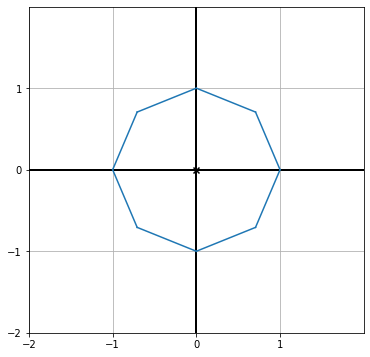

In [169]:
draw(Polygon(*regular_polygon(8)))